## Import librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import des datasets

In [2]:
fraud = pd.read_csv("Fraud_Data.csv")
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
ip = pd.read_csv("IpAddress_to_Country.csv", error_bad_lines=False)
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Matching pays 

In [4]:
def finder(arg):
    try:
        return ip.country[(ip.lower_bound_ip_address <= arg) & (ip.upper_bound_ip_address >= arg)].iloc[0]
    except IndexError:
        return "Unknown"

In [5]:
fraud["country"]= fraud.ip_address.apply(finder)
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Découverte du dataset

In [6]:
fraud.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,151112.0,2.001710e+05,1.153693e+05,2.000000,1.006425e+05,1.999580e+05,3.000540e+05,4.000000e+05
purchase_value,151112.0,3.693537e+01,1.832276e+01,9.000000,2.200000e+01,3.500000e+01,4.900000e+01,1.540000e+02
age,151112.0,3.314070e+01,8.617733e+00,18.000000,2.700000e+01,3.300000e+01,3.900000e+01,7.600000e+01
ip_address,151112.0,2.152145e+09,1.248497e+09,52093.496895,1.085934e+09,2.154770e+09,3.243258e+09,4.294850e+09
class,151112.0,9.364577e-02,2.913362e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [7]:
fraud.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  country         151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


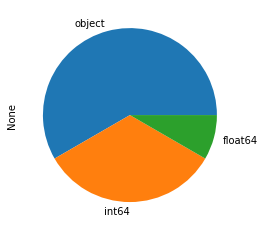

In [9]:
fraud.dtypes.value_counts().plot.pie()

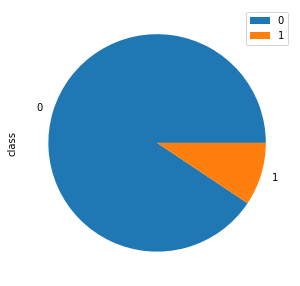

In [10]:
fraud["class"].value_counts().plot.pie(figsize=(5,5),subplots=True, legend=True)
plt.show()

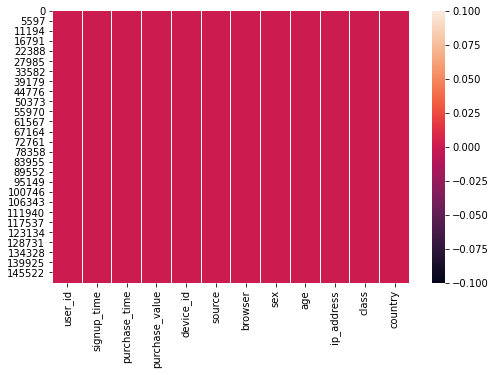

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(fraud.isna())
plt.show()
# pas de colonnes vides 

In [12]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [13]:
# supprimer les colonnes "device_id" & "ip_adress"
fraud = fraud.drop(columns=["device_id","ip_address","user_id"])
fraud.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States


In [14]:
fraud["class"].value_counts(normalize=True)
#dataset déséquilibré donc on pour utiliser des metrics telles que la sensibilité, le f1 score 

0    0.906354
1    0.093646
Name: class, dtype: float64

In [15]:
for col in fraud.select_dtypes("int"):
  print(col)

purchase_value
age
class


### DATE/TIME

In [16]:
fraud.signup_time = pd.to_datetime(fraud.signup_time, format ="%Y-%m-%d %H:%M:%S")
fraud.purchase_time = pd.to_datetime(fraud.purchase_time, format ="%Y-%m-%d %H:%M:%S")
fraud["time_delta"] = (fraud.purchase_time - fraud.signup_time)/np.timedelta64(1, 's')

In [17]:
fraud['year'] = pd.DatetimeIndex(fraud['purchase_time']).year
fraud['month'] = pd.DatetimeIndex(fraud['purchase_time']).month

In [18]:
fraud = fraud.rename(columns={"class":"class_fraud"})

In [19]:
fraud.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class_fraud,country,time_delta,year,month
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,4506682.0,2015,4
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,17944.0,2015,6
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,1.0,2015,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown,492085.0,2015,5
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,4361461.0,2015,9


## Dataviz

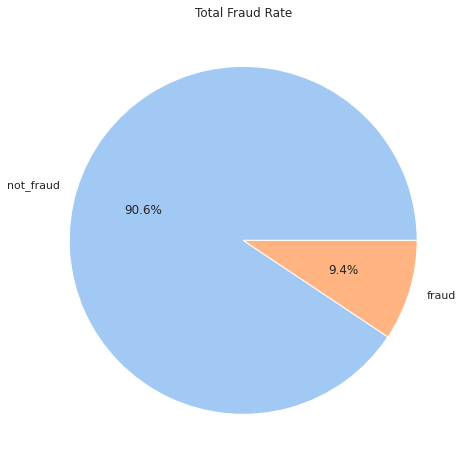

In [20]:
sns.set(style="ticks", palette="pastel")

### TOTAL FRAUD RATE ###
fig = plt.figure(figsize=(15,8))
not_fraud = fraud[fraud.class_fraud== 0].class_fraud.value_counts()
frauds = fraud[fraud.class_fraud == 1].class_fraud.value_counts()

labels = ['not_fraud','fraud']

fraud_pie = np.concatenate((not_fraud, frauds), axis=0)

plt.pie(fraud_pie, labels=labels, autopct='%1.1f%%')
plt.title("Total Fraud Rate")
plt.show()

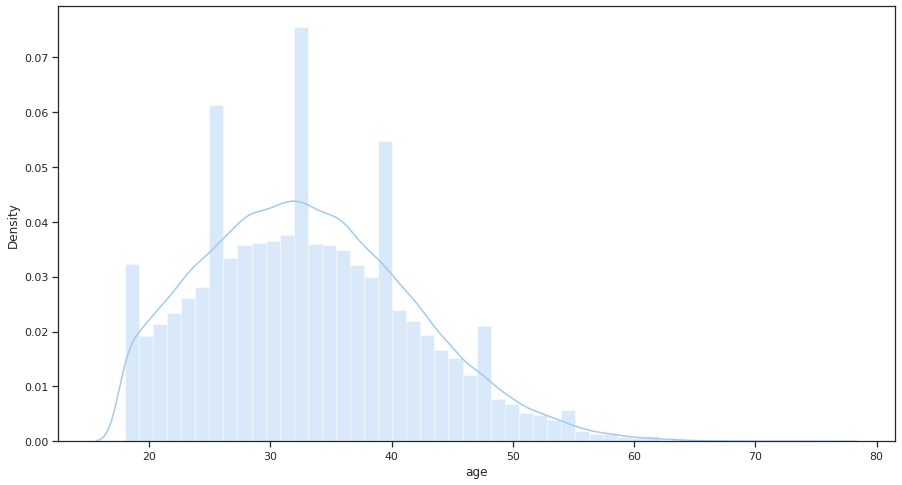

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(fraud.age)
plt.show()

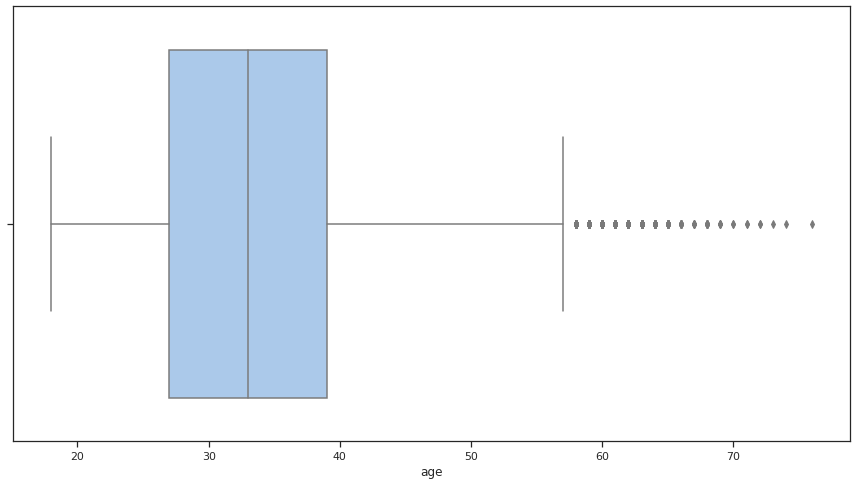

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(fraud.age)


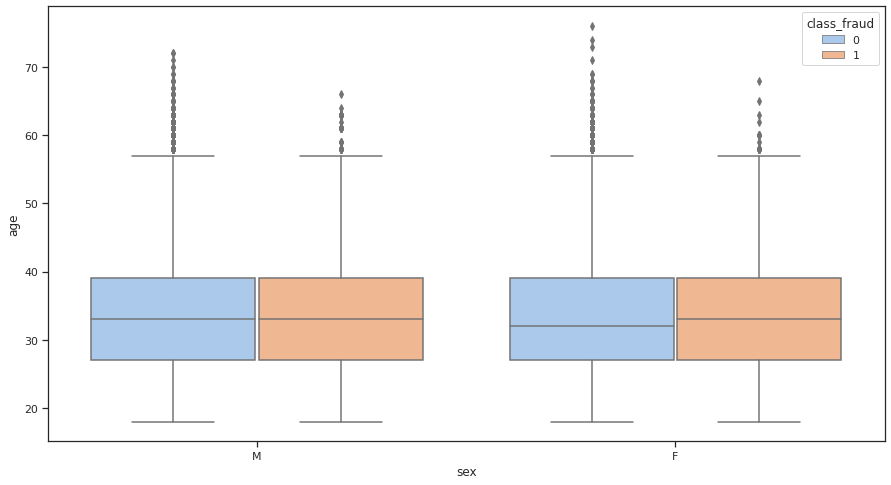

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sns.boxplot(x=fraud.sex, y=fraud.age, hue=fraud.class_fraud)

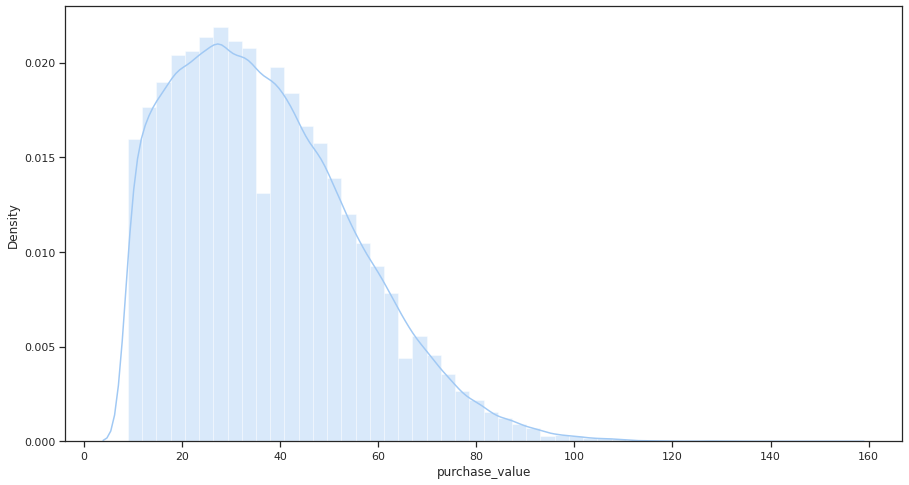

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(fraud.purchase_value)

#fig = plt.figure(figsize=(15,8))
#fig = sns.distplot(X3.purchase_value)

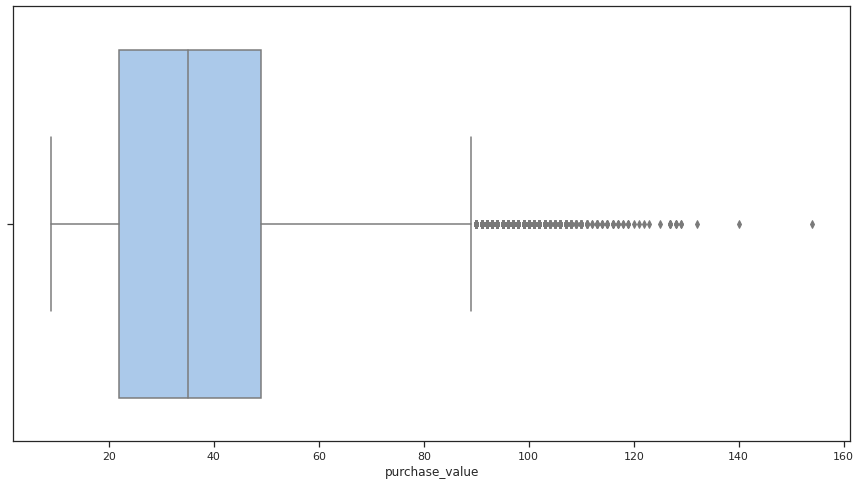

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(fraud.purchase_value)

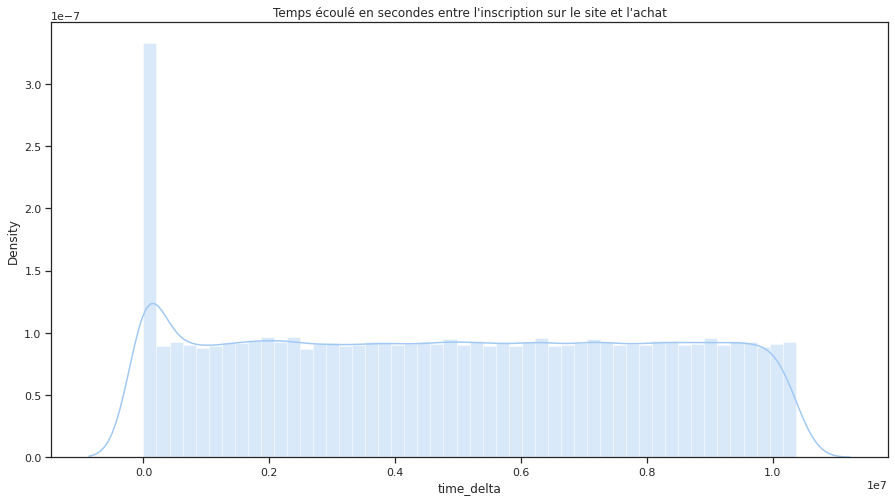

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(fraud['time_delta'])
plt.title("Temps écoulé en secondes entre l'inscription sur le site et l'achat")
plt.show()

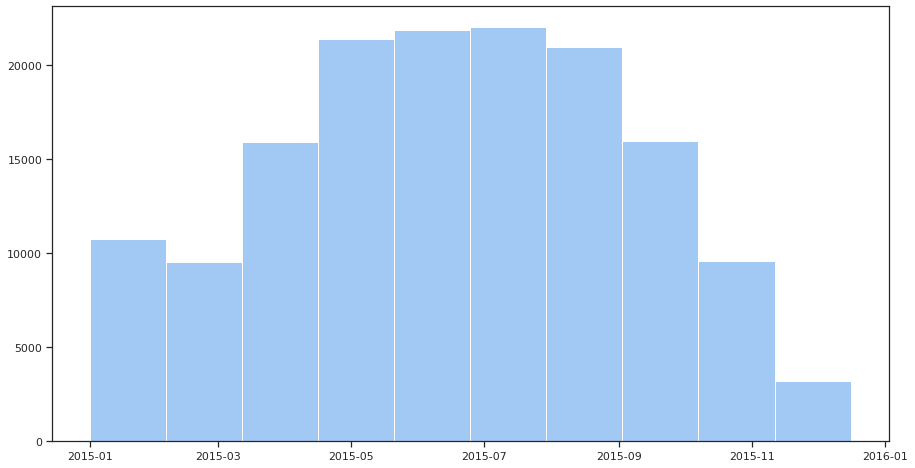

In [27]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(15,8))
fig = plt.hist(fraud["purchase_time"])
plt.show()

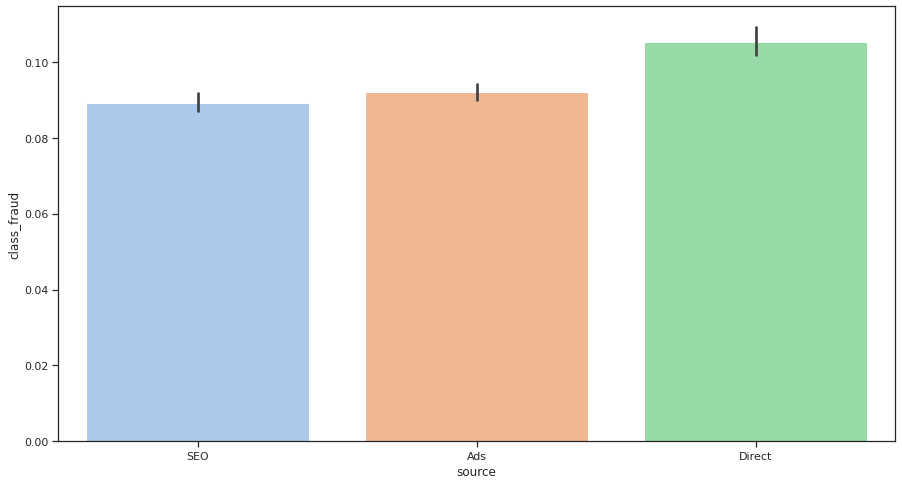

In [28]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="source", y="class_fraud", data=fraud)

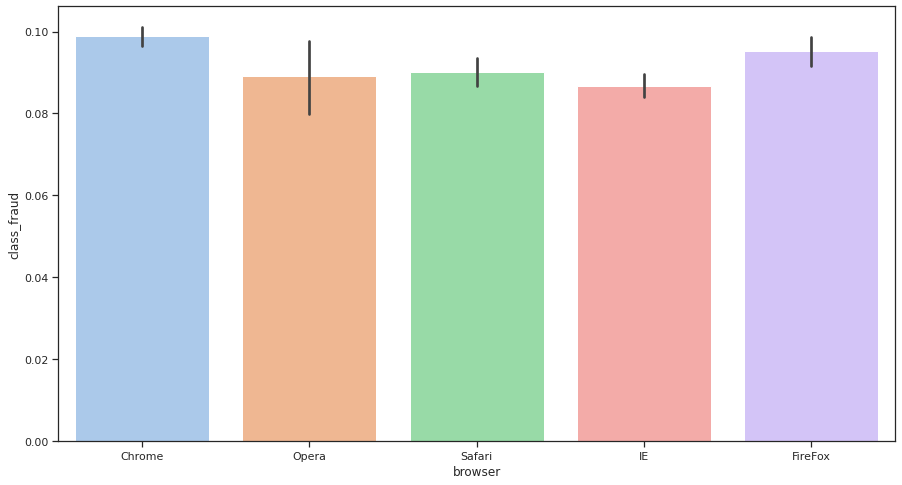

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x="browser", y="class_fraud", data=fraud)

In [32]:
fraud_pv = fraud[['purchase_value', 'class_fraud']].groupby(['purchase_value', 'class_fraud'], as_index = False).size().unstack().fillna(0)
fraud_pv.head()

purchase_value  0     9
                1     9
                2    10
                3    10
                4    11
dtype: int64

## Preprocessing

In [33]:
fraud.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class_fraud,country,time_delta,year,month
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,SEO,Chrome,M,39,0,Japan,4506682.0,2015,4
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,Ads,Chrome,F,53,0,United States,17944.0,2015,6
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,SEO,Opera,M,53,1,United States,1.0,2015,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,SEO,Safari,M,41,0,Unknown,492085.0,2015,5
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,Ads,Safari,M,45,0,United States,4361461.0,2015,9


In [34]:
fraud_df = fraud.iloc[:,2:]
fraud_df.head()

,purchase_value,source,browser,sex,age,class_fraud,country,time_delta,year,month
0,34,SEO,Chrome,M,39,0,Japan,4506682.0,2015,4
1,16,Ads,Chrome,F,53,0,United States,17944.0,2015,6
2,15,SEO,Opera,M,53,1,United States,1.0,2015,1
3,44,SEO,Safari,M,41,0,Unknown,492085.0,2015,5
4,39,Ads,Safari,M,45,0,United States,4361461.0,2015,9


In [35]:
X = fraud_df.iloc[:,fraud_df.columns!="class_fraud"]
X.head()

,purchase_value,source,browser,sex,age,country,time_delta,year,month
0,34,SEO,Chrome,M,39,Japan,4506682.0,2015,4
1,16,Ads,Chrome,F,53,United States,17944.0,2015,6
2,15,SEO,Opera,M,53,United States,1.0,2015,1
3,44,SEO,Safari,M,41,Unknown,492085.0,2015,5
4,39,Ads,Safari,M,45,United States,4361461.0,2015,9


In [36]:
y = fraud_df.drop(X,axis=1)
y.head()

,class_fraud
0,0
1,0
2,1
3,0
4,0


In [37]:
X.head()

,purchase_value,source,browser,sex,age,country,time_delta,year,month
0,34,SEO,Chrome,M,39,Japan,4506682.0,2015,4
1,16,Ads,Chrome,F,53,United States,17944.0,2015,6
2,15,SEO,Opera,M,53,United States,1.0,2015,1
3,44,SEO,Safari,M,41,Unknown,492085.0,2015,5
4,39,Ads,Safari,M,45,United States,4361461.0,2015,9


In [38]:
cat = [i for i in X.select_dtypes("object")]
X_cat = pd.get_dummies(X.loc[:,cat])
X_cat.head()

,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,country_Botswana,country_Brazil,country_British Indian Ocean Territory,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,...,country_Saint Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia (SLOVAK Republic),country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
num = [x for x in X.select_dtypes(exclude="object")]
X_num = X.loc[:,num]
X_num.head()

,purchase_value,age,time_delta,year,month
0,34,39,4506682.0,2015,4
1,16,53,17944.0,2015,6
2,15,53,1.0,2015,1
3,44,41,492085.0,2015,5
4,39,45,4361461.0,2015,9


In [40]:
from sklearn.model_selection import train_test_split
X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(X_cat, X_num, y, stratify=y, test_size=0.3, random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_num_train = pd.DataFrame(sc_x.fit_transform(X_num_train), columns=X_num_train.columns, index=X_num_train.index)
X_num_test = pd.DataFrame(sc_x.transform(X_num_test), columns=X_num_test.columns, index=X_num_test.index)

X_train = pd.merge(X_cat_train,X_num_train,left_index=True, right_index=True)
X_test = pd.merge(X_cat_test,X_num_test,left_index=True,right_index=True)

In [ ]:
#from sklearn.preprocessing import KBinsDiscretizer
#kb = KBinsDiscretizer(10)
#X_train_discrete = pd.DataFrame(kb.fit_transform(X_train).toarray())
#X_test_discrete = pd.DataFrame(kb.transform(X_test).toarray())

#X_train_discrete = pd.get_dummies(X_train_discrete)
#X_test_discrete = pd.get_dummies(X_test_discrete)

#X_train_discrete.head()

## MODELS

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
classifier.score(X_test, y_test)

0.9092513345391979

In [44]:
classifier.score(X_train, y_train)

0.9092817031896991

In [45]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41089
           1       0.88      0.04      0.07      4245

    accuracy                           0.91     45334
   macro avg       0.90      0.52      0.51     45334
weighted avg       0.91      0.91      0.87     45334



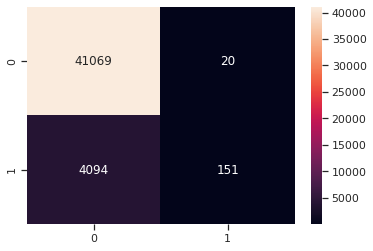

In [55]:
# Matrice du confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

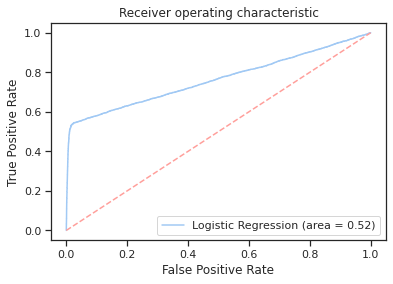

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.001, 0.01, 0.1, 1, 2, 5, 10], "penalty":["l1", "l2"], "class_weight" : ["balanced"]}

grid = GridSearchCV(classifier, param_grid)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
grid.best_estimator_.score(X_test,y_test)

0.7182909074866546

In [67]:
grid.best_estimator_.score(X_train,y_train)

0.721454366692507

In [68]:
grid.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [69]:
grid_pred = grid.predict(X_test)
grid_pred

array([1, 0, 1, ..., 0, 0, 1])

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     41089
           1       0.20      0.66      0.31      4245

    accuracy                           0.72     45334
   macro avg       0.58      0.69      0.56     45334
weighted avg       0.88      0.72      0.77     45334



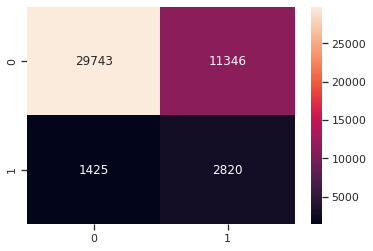

In [74]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,grid_pred),annot=True, fmt='d')

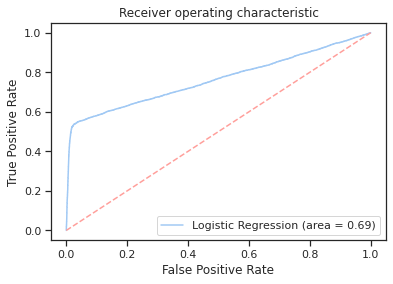

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2 = roc_auc_score(y_test, grid_pred)
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2')
plt.show()

In [79]:
roc_auc_score(y_test, grid_pred)

0.6940893279408045

In [76]:
grid.predict_proba(X_test)[:,1]

array([0.50616915, 0.47324208, 0.58942414, ..., 0.31523171, 0.26415351,
       0.77669987])

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.9561256452110999

In [81]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": range(20, 50)}

clf = GridSearchCV(cv=5, estimator=rf_classifier, scoring="accuracy", n_jobs=-1, verbose=1, param_grid=params).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 22.5min finished


In [83]:
clf.best_params_

{'n_estimators': 48}

In [84]:
clf.best_estimator_.score(X_test, y_test)

0.9561035867119602

In [91]:
clf_preclf.predict(X_test)

NameError: ignored

In [85]:
feature_importance = pd.DataFrame({'importance':clf.best_estimator_.feature_importances_, 'features':X_train.columns})
feature_importance.sort_values("importance", ascending=False)

,importance,features
194,0.476658,time_delta
196,0.219515,month
192,0.113126,purchase_value
193,0.095649,age
3,0.005712,browser_Chrome
...,...,...
31,0.000000,country_Bonaire; Sint Eustatius; Saba
153,0.000000,country_San Marino
185,0.000000,country_Vanuatu
39,0.000000,country_Burundi
